In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
year_test = 2017
area = 'FR'

## Data

In [3]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/'

avail_factor_df = pd.read_csv(INPUT_FOLDER + 'r_availabilityFactor' + str(year_test) + '_' + str(area) + '.csv')
area_consumption_df = pd.read_csv(INPUT_FOLDER + 'r_areaConsumption_no_phes' + str(year_test) + '_' + str(area) + '.csv')
tech_case='r_article_ramp'
tech_parameters_df = pd.read_csv(INPUT_FOLDER+'Gestion_'+tech_case+'_TECHNOLOGIES'+str(year_test)+'.csv')
tech_parameters_df.fillna(0, inplace=True)

avail_factor_df = avail_factor_df.join(tech_parameters_df.set_index('TECHNOLOGIES')['capacity'], on='TECHNOLOGIES')
avail_factor_df = avail_factor_df.assign(real_capacity=lambda x:x.capacity*x.availabilityFactor)
real_capacities = avail_factor_df[['TIMESTAMP', 'real_capacity']].groupby('TIMESTAMP').sum()
real_capacities.reset_index(inplace=True)
real_capacities['margin'] = real_capacities['real_capacity'] - area_consumption_df['areaConsumption']

prices = pd.read_csv(INPUT_FOLDER + 'r_da_prices.csv')
drivers = pd.read_csv(INPUT_FOLDER + 'r_fuel_prices_15_18.csv')
margin = real_capacities['margin']
print(prices, drivers, margin)

      AREAS              DateTime  price_obs
0        FR  2015-01-01T00:00:00Z      51.93
1        FR  2015-01-01T01:00:00Z      48.76
2        FR  2015-01-01T02:00:00Z      42.27
3        FR  2015-01-01T03:00:00Z      38.41
4        FR  2015-01-01T04:00:00Z      35.72
...     ...                   ...        ...
35059    FR  2018-12-31T19:00:00Z      50.01
35060    FR  2018-12-31T20:00:00Z      45.50
35061    FR  2018-12-31T21:00:00Z      49.80
35062    FR  2018-12-31T22:00:00Z      44.26
35063    FR  2018-12-31T23:00:00Z      51.00

[35064 rows x 3 columns]                   date_time   oil_price  coal_price  gas_price  co2_price
0      2015-01-01T00:00:00Z  352.446024   93.546575  38.051287   6.903732
1      2015-01-01T01:00:00Z  352.422575   93.554525  38.022534   6.903888
2      2015-01-01T02:00:00Z  352.399126   93.562475  37.993781   6.904044
3      2015-01-01T03:00:00Z  352.375677   93.570425  37.965028   6.904199
4      2015-01-01T04:00:00Z  352.352228   93.578375  37.936275  

## Plot observed data

In [4]:
# Keep only year_test
deb = (year_test - 2015)*8760
fin = (year_test - 2014)*8760
prices = prices[deb:fin]
drivers = drivers[deb:fin]
time = prices['DateTime'][deb:fin]
col_drivers = list(drivers.columns.values)
col_drivers.remove('date_time')
print(col_drivers)

['oil_price', 'coal_price', 'gas_price', 'co2_price']


### Plot fuel and CO_2 drivers

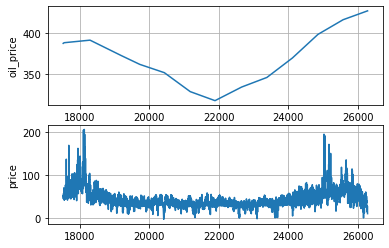

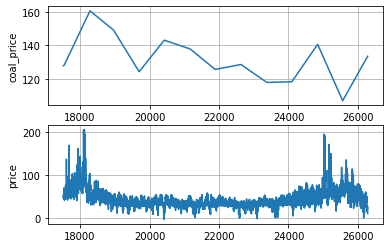

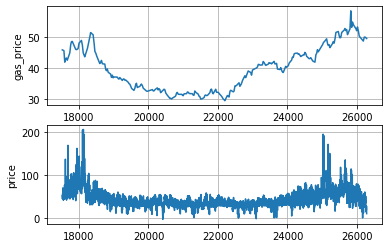

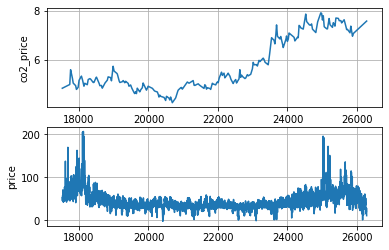

In [5]:
deb = 0
fin = 8760
fig, axs = plt.subplots(2, 1)

axs[0].plot(drivers['oil_price'][deb:fin])
axs[0].set_xlabel('time')
axs[0].set_ylabel('oil_price')
axs[0].grid(True)

axs[1].plot(prices['price_obs'][deb:fin])
axs[1].set_ylabel('price')
axs[1].grid(True)
fig, axs = plt.subplots(2, 1)

axs[0].plot(drivers['coal_price'][deb:fin])
axs[0].set_xlabel('time')
axs[0].set_ylabel('coal_price')
axs[0].grid(True)

axs[1].plot(prices['price_obs'][deb:fin])
axs[1].set_ylabel('price')
axs[1].grid(True)
fig, axs = plt.subplots(2, 1)

axs[0].plot(drivers['gas_price'][deb:fin])
axs[0].set_xlabel('time')
axs[0].set_ylabel('gas_price')
axs[0].grid(True)

axs[1].plot(prices['price_obs'][deb:fin])
axs[1].set_ylabel('price')
axs[1].grid(True)
fig, axs = plt.subplots(2, 1)

axs[0].plot(drivers['co2_price'][deb:fin])
axs[0].set_xlabel('time')
axs[0].set_ylabel('co2_price')
axs[0].grid(True)

axs[1].plot(prices['price_obs'][deb:fin])
axs[1].set_ylabel('price')
axs[1].grid(True)

### Plot margin driver

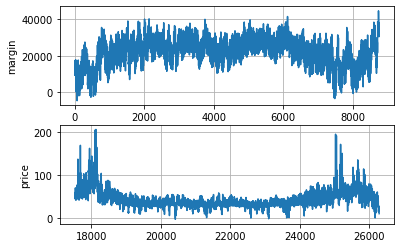

In [6]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(margin[deb:fin])
axs[0].set_xlabel('time')
axs[0].set_ylabel('margin')
axs[0].grid(True)

axs[1].plot(prices['price_obs'][deb:fin])
axs[1].set_ylabel('price')
axs[1].grid(True)

## Fourier analysis of observed data

#### Prices

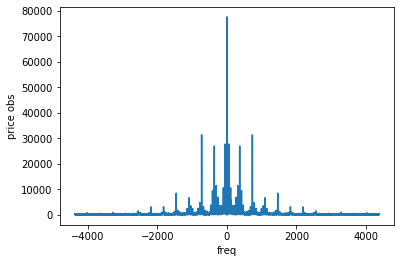

In [7]:
price = prices['price_obs'] - np.mean(prices['price_obs'])
prices_fou = np.fft.fft(price)
prices_coef_fou = np.abs(prices_fou)
freq = np.fft.fftfreq(len(price), 1/8760)
plt.xlabel('freq')
plt.ylabel('price obs')
plt.plot(freq, prices_coef_fou);

[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00000000e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42857143e+00
  2.99897295e+00  2.66585514e+00  2.39737274e+00  2.17964668e+00
  2.00182815e+00 -2.17964668e+00 -2.39737274e+00 -2.66585514e+00
 -2.99897295e+00 -3.42857143e+00 -4.00000000e+00 -4.80000000e+00
 -6.00000000e+00 -8.00000000e+00 -1.20000000e+01 -2.40000000e+01]


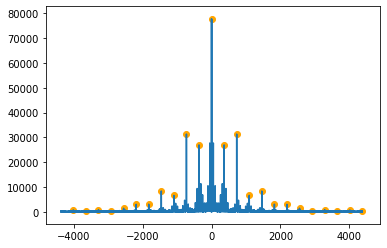

In [8]:
from scipy.signal import argrelextrema
c_max_index = argrelextrema(prices_coef_fou, np.greater, order=300)
print(8760/freq[c_max_index])
plt.plot(freq, prices_coef_fou)
plt.scatter(freq[c_max_index], prices_coef_fou[c_max_index], color='orange');

#### Margin

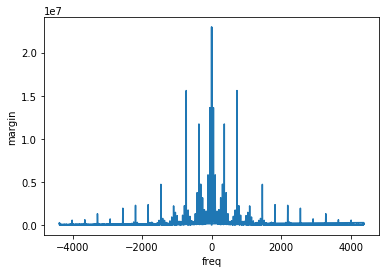

In [9]:
margin = margin - np.mean(margin)
margin_fou = np.fft.fft(margin)
margin_coef_fou = np.abs(margin_fou)
freq = np.fft.fftfreq(len(price), 1/8760)
plt.xlabel('freq')
plt.ylabel('margin')
plt.plot(freq, margin_coef_fou);

[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00731261e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42857143e+00
  3.00000000e+00  2.66585514e+00  2.40065771e+00  2.18236173e+00
 -2.18236173e+00 -2.40065771e+00 -2.66585514e+00 -3.00000000e+00
 -3.42857143e+00 -4.00000000e+00 -4.80000000e+00 -6.00000000e+00
 -8.00731261e+00 -1.20000000e+01 -2.40000000e+01]


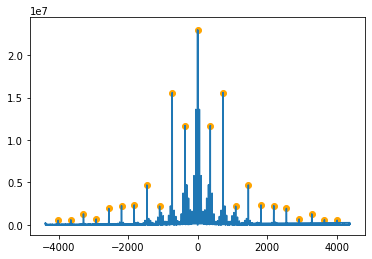

In [10]:
c_max_index = argrelextrema(margin_coef_fou, np.greater, order=300)
print(8760/freq[c_max_index])
plt.plot(freq, margin_coef_fou)
plt.scatter(freq[c_max_index], margin_coef_fou[c_max_index], color='orange');

#### Compare margin and prices fourier coefficients

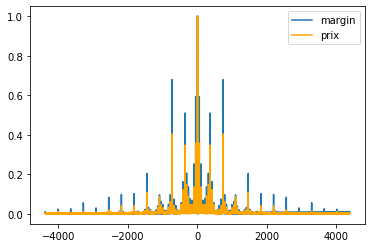

In [11]:
margin = (margin - np.mean(margin))
margin_fou = np.fft.fft(margin)
margin_coef_fou = np.abs(margin_fou)
freq = np.fft.fftfreq(len(price), 1/8760)
price = prices['price_obs'] - np.mean(prices['price_obs'])
prices_fou = np.fft.fft(price)
prices_coef_fou = np.abs(prices_fou)
plt.plot(freq, margin_coef_fou / np.max(margin_coef_fou), label='margin')
plt.plot(freq, prices_coef_fou / np.max(prices_coef_fou), label='prix', color='orange')
plt.legend();

1.0


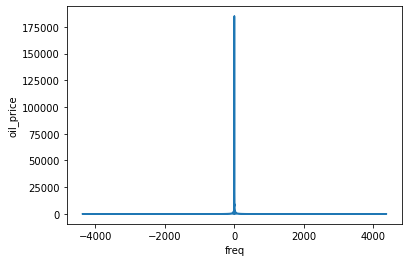

1.0


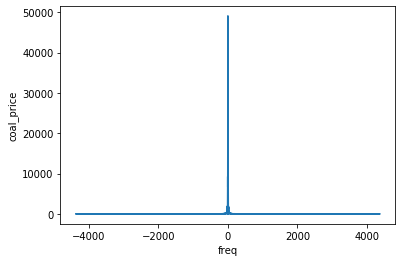

-1.0


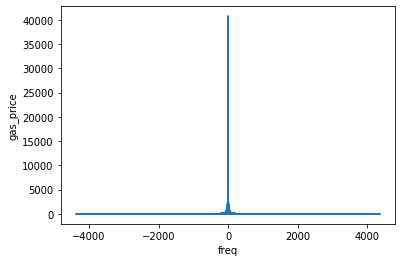

-1.0


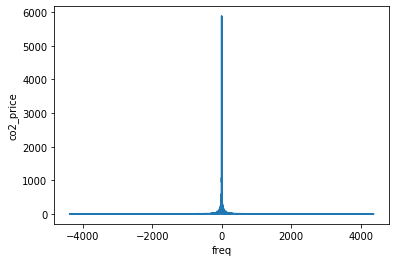

In [12]:
for driver in col_drivers:
    values = drivers[driver]
    values = values - np.mean(values)
    values_fou = np.fft.fft(values)
    values_coef_fou = np.abs(values_fou)
    freq = np.fft.fftfreq(len(values), 1/8760)
    plt.xlabel('freq')
    plt.ylabel(driver)
    plt.plot(freq, values_coef_fou)
    print(freq[np.argmax(values_coef_fou)])
    plt.show()

## Fourier analysis of simulated prices

### Linear model

In [13]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/'
RESULT_FOLDER = 'output_modified/test_contigu_linear/'
FOLDER = INPUT_FOLDER + RESULT_FOLDER

In [14]:
# Train sur 2015 et test sur 2015 pour voir
final_merit_order = pd.read_pickle(FOLDER + 'r_final_merit_order_df_list'+str(year_test)+str(year_test)+'.pkl')[-1]
final_merit_order.reset_index(inplace=True)
price_sim = final_merit_order['price_sim']

No handles with labels found to put in legend.


RMSE :  491.6553649379406
[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00000000e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42723005e+00
  2.66585514e+00  2.18127490e+00 -2.18127490e+00 -2.66585514e+00
 -3.42723005e+00 -4.00000000e+00 -4.80000000e+00 -6.00000000e+00
 -8.00000000e+00 -1.20000000e+01 -2.40000000e+01]


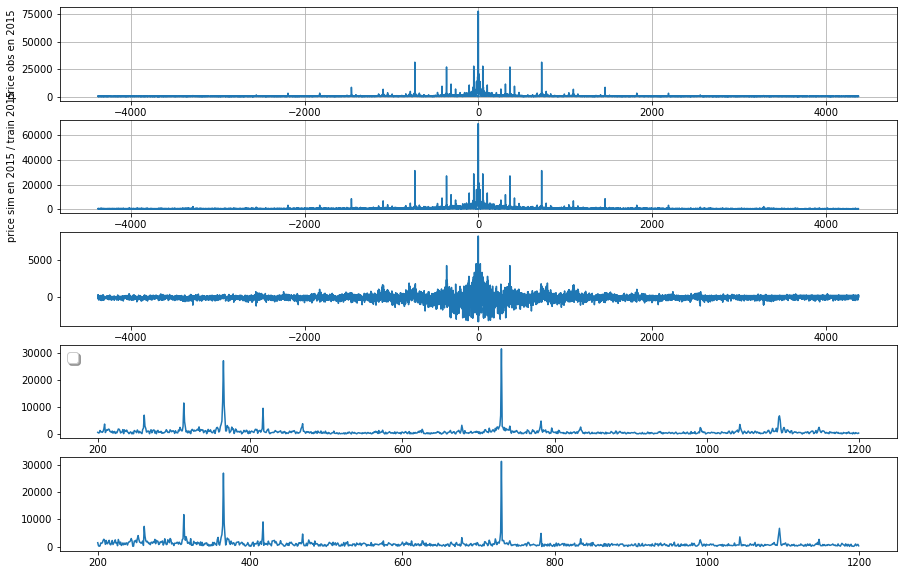

In [25]:
def display_fourier(price_obs, price_sim):
    """
    plot fourier coefficients of observed and simulated prices
    """
    fig, axs = plt.subplots(5, 1, figsize=(15, 10))

    price = price_obs - np.mean(price_obs)
    prices_fou = np.fft.fft(price)
    prices_coef_fou_obs = np.abs(prices_fou)
    freq = np.fft.fftfreq(len(price), 1/8760)
    axs[0].plot(freq, prices_coef_fou_obs)
    axs[0].set_xlabel('freq')
    axs[0].set_ylabel('price obs')
    axs[0].grid(True)

    price = price_sim - np.mean(price_sim)
    prices_fou = np.fft.fft(price)
    prices_coef_fou_sim = np.abs(prices_fou)
    freq = np.fft.fftfreq(len(price), 1/len(price))
    axs[1].plot(freq, prices_coef_fou_sim)
    axs[1].set_xlabel('freq')
    axs[1].set_ylabel('price sim / train')
    axs[1].grid(True)
    axs[2].plot(freq, prices_coef_fou_obs-prices_coef_fou_sim)
    deb = 200
    fin = 1200
    axs[3].plot(freq[deb:fin], prices_coef_fou_obs[deb:fin])
    axs[4].plot(freq[deb:fin], prices_coef_fou_sim[deb:fin])

    # plot residual   
    print('RMSE : ', np.sqrt(np.mean( (prices_coef_fou_obs-prices_coef_fou_sim)**2 )))
    c_max_index = argrelextrema(prices_coef_fou_sim, np.greater, order=300)
    print(8760/freq[c_max_index])    

    return prices_coef_fou_obs-prices_coef_fou_sim

def print_phase(price_obs, price_sim):
    """
    plot phase (fourier decomposition) of observed and simulated prices
    """
    fig, axs = plt.subplots(2, 1, figsize=(6, 10))
    
    price = price_obs - np.mean(price_obs)
    prices_fou = np.fft.fft(price)
    prices_coef_fou_obs = np.angle(prices_fou)
    freq = np.fft.fftfreq(len(price), 1/8760)
    axs[0].plot(freq, prices_coef_fou_obs)
    axs[0].set_xlabel('freq')
    axs[0].set_ylabel('price obs')
    axs[0].grid(True)
    
    price = price_sim - np.mean(price_sim)
    prices_fou = np.fft.fft(price)
    prices_coef_fou_sim = np.angle(prices_fou)
    freq = np.fft.fftfreq(len(price), 1/len(price))
    axs[1].plot(freq, prices_coef_fou_sim)
    axs[1].set_xlabel('freq')
    axs[1].set_ylabel('price sim / train')
    axs[1].grid(True)
    
res_linear = display_fourier(prices['price_obs'], price_sim)

### Local linear model

#### Gaussian Weekly

No handles with labels found to put in legend.


RMSE :  1006.0542227085456
[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00000000e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42723005e+00
  2.99897295e+00  2.66585514e+00  2.40065771e+00  2.18127490e+00
 -2.18127490e+00 -2.40065771e+00 -2.66585514e+00 -2.99897295e+00
 -3.42723005e+00 -4.00000000e+00 -4.80000000e+00 -6.00000000e+00
 -8.00000000e+00 -1.20000000e+01 -2.40000000e+01]


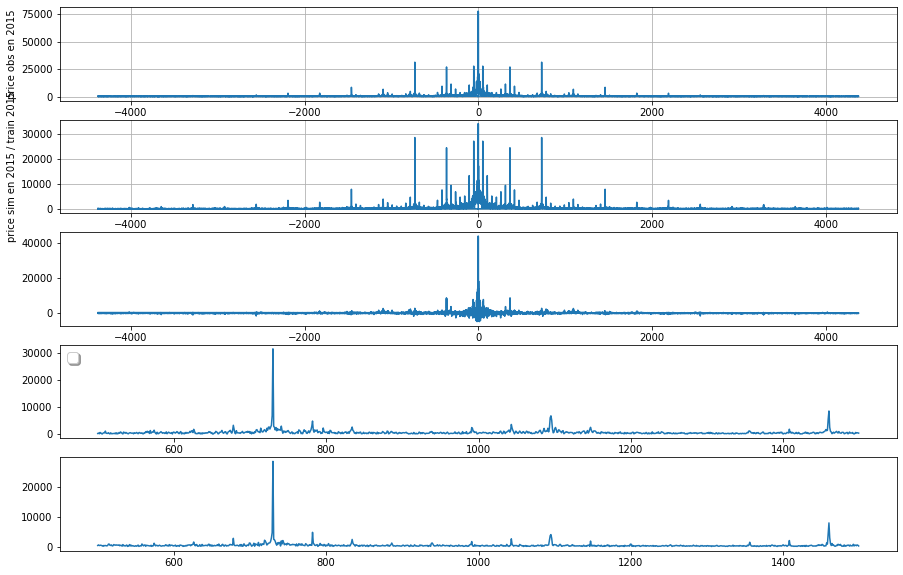

In [16]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/'
RESULT_FOLDER = 'output_modified/gaussian_hebdo_2015/'
FOLDER = INPUT_FOLDER + RESULT_FOLDER
# Train sur 2015 et test sur 2015 pour voir
final_merit_order = pd.read_pickle(FOLDER + 'r_final_merit_order_df_list20152015.pkl')[-1]
final_merit_order.reset_index(inplace=True)
price_sim = final_merit_order['price_sim']
res_local_hebdo = display_fourier(prices['price_obs'], price_sim)

#### Gaussian Daily

No handles with labels found to put in legend.


RMSE :  524.3953639858961
[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00000000e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42857143e+00
  3.00102775e+00  2.66747868e+00  2.40065771e+00  2.18181818e+00
 -2.18181818e+00 -2.40065771e+00 -2.66747868e+00 -3.00102775e+00
 -3.42857143e+00 -4.00000000e+00 -4.80000000e+00 -6.00000000e+00
 -8.00000000e+00 -1.20000000e+01 -2.40000000e+01]


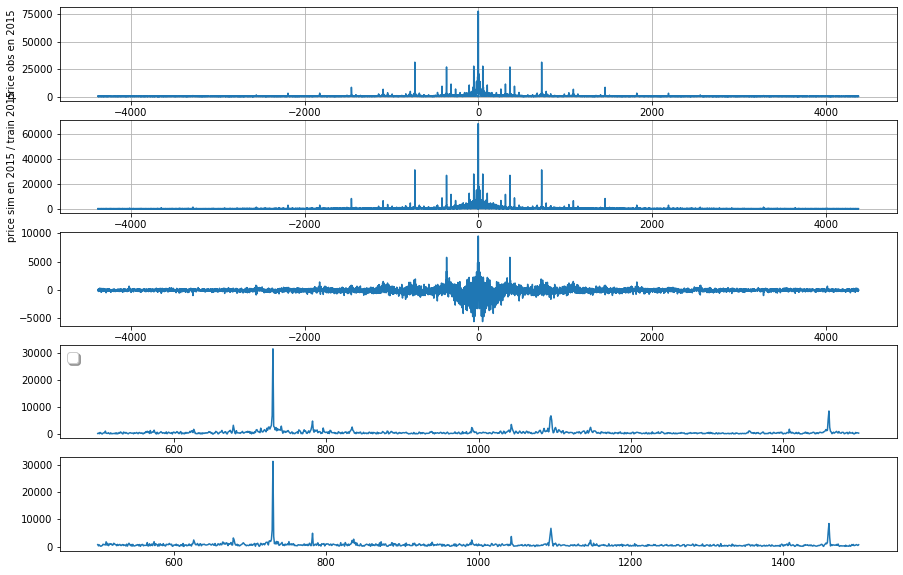

In [17]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/'
RESULT_FOLDER = 'output_modified/gaussian_daily_2017/'
FOLDER = INPUT_FOLDER + RESULT_FOLDER
# Train sur 2015 et test sur 2015 pour voir
final_merit_order = pd.read_pickle(FOLDER + 'r_final_merit_order_df_list'+str(year_test)+str(year_test)+'.pkl')[-1]
final_merit_order.reset_index(inplace=True)
price_sim = final_merit_order['price_sim']
res_local_gaussian_daily = display_fourier(prices['price_obs'], price_sim)

#### Window Daily

No handles with labels found to put in legend.


RMSE :  480.8831440827509
[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00000000e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42857143e+00
  3.00102775e+00  2.66747868e+00  2.40065771e+00  2.18181818e+00
 -2.18181818e+00 -2.40065771e+00 -2.66747868e+00 -3.00102775e+00
 -3.42857143e+00 -4.00000000e+00 -4.80000000e+00 -6.00000000e+00
 -8.00000000e+00 -1.20000000e+01 -2.40000000e+01]


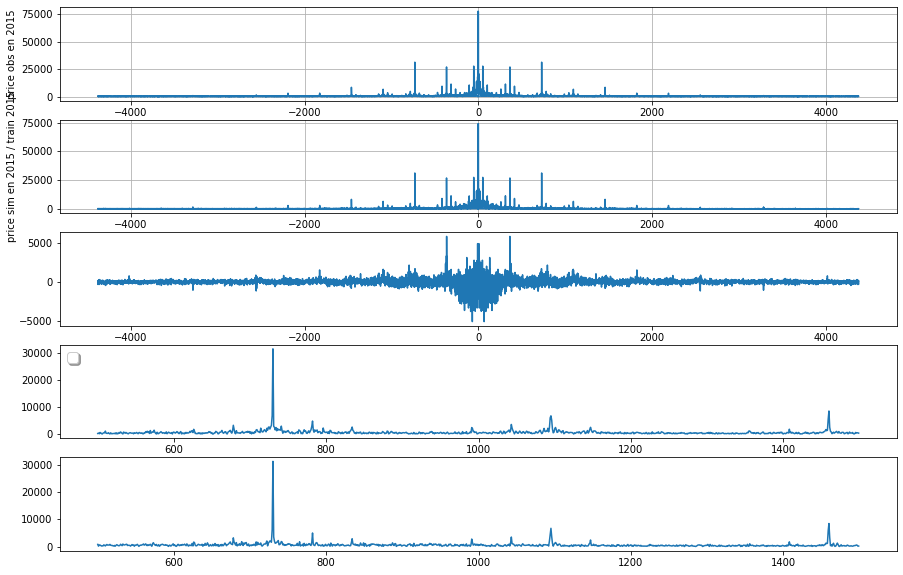

In [18]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/'
RESULT_FOLDER = 'output_modified/window_daily_2017/'
FOLDER = INPUT_FOLDER + RESULT_FOLDER
# Train sur 2015 et test sur 2015 pour voir
final_merit_order = pd.read_pickle(FOLDER + 'r_final_merit_order_df_list'+str(year_test)+str(year_test)+'.pkl')[-1]
final_merit_order.reset_index(inplace=True)
price_sim = final_merit_order['price_sim']
res_local_window_daily = display_fourier(prices['price_obs'], price_sim)

#### Window Mi Daily

No handles with labels found to put in legend.


RMSE :  491.6553649379406
[ 8.76000000e+03  2.40000000e+01  1.20000000e+01  8.00000000e+00
  6.00000000e+00  4.80000000e+00  4.00000000e+00  3.42723005e+00
  2.66585514e+00  2.18127490e+00 -2.18127490e+00 -2.66585514e+00
 -3.42723005e+00 -4.00000000e+00 -4.80000000e+00 -6.00000000e+00
 -8.00000000e+00 -1.20000000e+01 -2.40000000e+01]


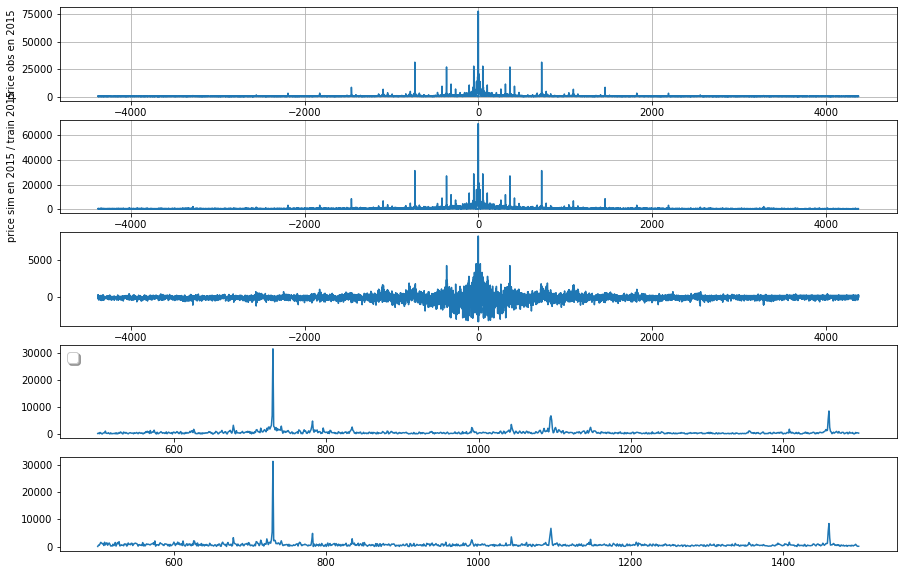

In [19]:
INPUT_FOLDER = 'C:/Users/cotil/Desktop/COURS/Mines/2A/Sophia/Projet/main/data_elecprices/'
RESULT_FOLDER = 'output_modified/window_mi_daily_2017/'
FOLDER = INPUT_FOLDER + RESULT_FOLDER
# Train sur 2015 et test sur 2015 pour voir
final_merit_order = pd.read_pickle(FOLDER + 'r_final_merit_order_df_list'+str(year_test)+str(year_test)+'.pkl')[-1]
final_merit_order.reset_index(inplace=True)
price_sim = final_merit_order['price_sim']
res_local_window_mi_daily = display_fourier(prices['price_obs'], price_sim)

#### Residuals 

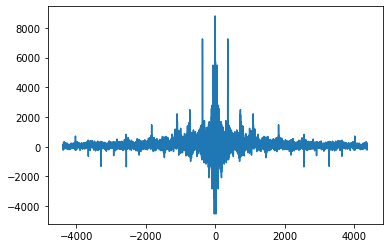

In [20]:
freq = np.fft.fftfreq(len(price), 1/8760)
plt.plot(freq, res_linear)

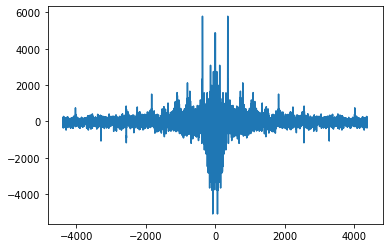

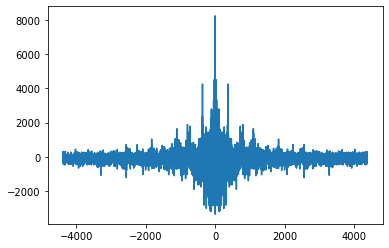

In [21]:
plt.plot(freq, res_local_window_daily)
plt.show()
plt.plot(freq, res_local_window_mi_daily)

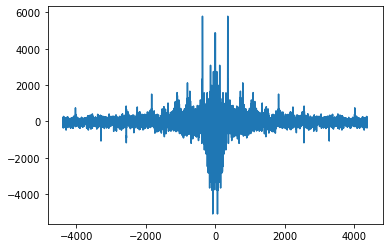

In [22]:
plt.plot(freq, res_local_window_daily)

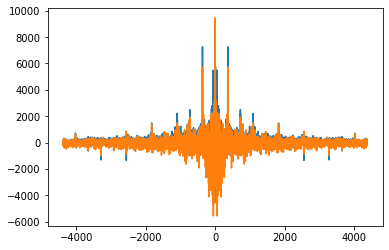

In [23]:
plt.plot(freq, res_linear)
plt.plot(freq, res_local_gaussian_daily)

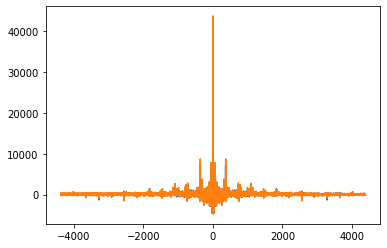

In [24]:
plt.plot(freq, res_linear)
plt.plot(freq, res_local_hebdo)